# 3.1. k-최근접 이웃 회귀
### 분류
- 예측하려는 샘플에 가장 가까운 샘플 K를 선택
- 그 다음 이 샘플들의 클래스를 확인하여, 다수 클래스를 새로운 샘플릥 클래스로 예측
### 회귀
- 예측하려는 샘플에 가장 가까운 샘플 k를 선택
- 평균값 계산


In [ ]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

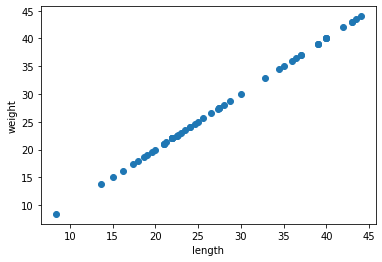

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(perch_length, perch_length) 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state = 1223)

In [ ]:
# 사이킷런에 사용할 훈련셋은 2차월 배열이여함
# 2차원 배열로 만들기 위해서는 억지로 배열을 하나 추가해야 함
t_a = np.array([1,2,3,4])
print(t_a.shape)

t_a.reshape(2,2)

(4,)


array([[1, 2],
       [3, 4]])

In [ ]:
X_train.shape # 42행 0열인 이 array 값을 2차원 배열 형태로 바꾸어야 함
# 42,) -> (42, 1)

(42,)

In [ ]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1,1)
print(X_train.shape, X_test.shape)

(42, 1) (14, 1)


In [ ]:
# 학습 후 결정계수로 결과 확인하기

from sklearn.neighbors import KNeighborsRegressor 
knr = KNeighborsRegressor()

# k최근접이웃회귀모델
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# k최근접이웃회귀모델
knr.score(X_train, y_train)

0.9831932927411713

In [ ]:
print(knr.score(X_test, y_test))

0.9457622399994386


In [ ]:
# 분류의 경우, 테스트셋에 있는 샘플을 정확하게 분류한 개수의 비율 : 정확도, 정답을 맞힌 개수의 비율
# 회귀의 경우, 결정계수, coefficient of determination 이라고 부름 
# 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함
# 그 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눔
# 타깃의 평균 정도를 예측하는 수준이라면, (분자와 분모가 비슷해져서) 0에 가까워짐
# 타깃이 예측이랑 가까우면, 분자가 0에 가깝기 떄문에 1에 가까운 값을 가짐 

In [ ]:
# 그러나 이 결정계수 값이 어느정도로 좋은지 직관적인 이해가 어렵다

from sklearn.metrics import mean_absolute_error 

# 테스트셋에 대한 예측을 만듦
test_prediction = knr.predict(X_test)

# 테스트셋에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, test_prediction)
print(mae)
# 예측값은 평균적으로 54g만큼 다르다고 해석할 수 있다. 
# 테스트오차

# 만약 학습오차가 필요하다면 아래와 같이 계산
train_pred = knr.predict(X_train)
train_mae = mean_absolute_error(y_train, train_pred)
print(train_mae)

# 27g 정도 차이를 냄

# 테스트 오차 대비 50% 수준으로 적은 오차

54.73571428571429
27.549523809523812


In [ ]:
# 과대적합 vs 과소적합
## 학습오차는 작으나 테스트오차는 클 경우 : 과대적합
## 학습오차는 크나 테스트오차는 작을 경우 : 과소적합

# 데이터셋이 너무 작을 경우, 과소 적합이 일어나기도 함

In [ ]:
knr.n_neighbors = 3

knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))

#k = 3 으로 줄였더니 결정계수 값이 더 커졌다

# 책 테스트와 다르게 random_state = 1223 으로 할 경우 아래와 같은 결과 발생
## 학습시 결정계수 : 0.9831932927411713
## 테스트시 결정계수 : 0.9807822652428189
# 결정계수는 감소, 성능이 더 떨어짐

0.9807822652428189


In [ ]:
print(knr.score(X_test, y_test))
# 테스트 시 결정계수 값도 

# k = 5 일떄의 결정계수 : 0.9457622399994386
# k = 3 일때의 결정계수 : 0.9592881687236459
## k 값을 줄이니 성능개선

0.9592881687236459


In [ ]:
# 확인문제 
## 1. k-최근접 이웃 회귀에서는 새로운 샘플에 대한 예측을 : 이웃 샘플의 타깃값의 평균으로 구함
## 2. 과대적합과 과소적합에 대해 직관적 이해를 위해 아래 코드 확인

In [ ]:
X_test

array([[43. ],
       [36. ],
       [24. ],
       [27.5],
       [37. ],
       [36.5],
       [24.6],
       [17.4],
       [39. ],
       [44. ],
       [23. ],
       [27.3],
       [21.3],
       [20. ]])

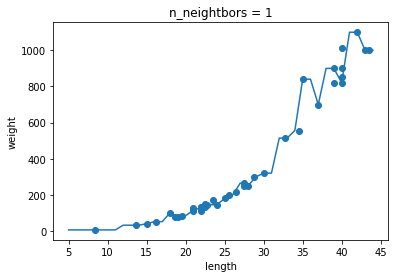

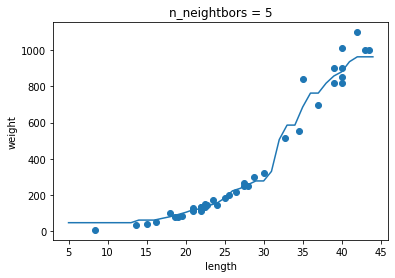

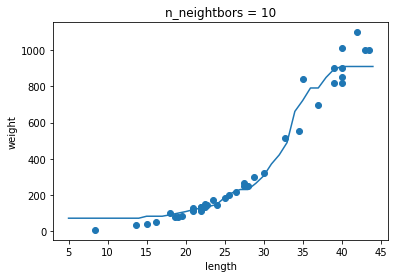

In [ ]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]: 
  knr.n_neighbors = n 
  knr.fit(X_train, y_train)

  train_pred = knr.predict(X_train)
  test_pred = knr.predict(x)  # '지정한 범위 x에대한 예측을 구하는 것이기 떄문에 x 를 넣음

  # 결과 그리기
  plt.scatter(X_train, y_train)
  plt.plot(x, test_pred)
  plt.title('n_neightbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

  # n 크기에 따라서 test_pred 의 그래프가 어느정도로 과적합되어있는지 확인이 가능